In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv('data/trainData.csv')
trainData.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,40,10,50,80,1,9,43,46,73,82,...,16,4,99,4,22,84,53,90,76,7347
1,91,25,99,25,3,23,1,46,14,72,...,33,57,46,48,91,96,24,32,77,7512
2,25,80,79,44,10,2,79,1,73,80,...,60,37,6,90,9,56,8,29,58,6466
3,26,72,34,67,63,11,74,82,89,92,...,35,84,85,47,43,96,94,43,75,10706
4,6,100,37,87,87,92,44,78,55,59,...,45,29,25,21,55,47,11,29,39,7379


In [3]:
trainData = trainData.sort_values('y')
xTrain = trainData.values[:,:-1]
yTrain = trainData.values[:,-1]

In [4]:
testData = pd.read_csv('data/testData.csv')
testData.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,0,68,94,34,56,15,40,89,6,44,...,7,93,22,26,99,35,15,48,51,93
1,17,94,31,75,6,15,44,74,40,38,...,83,46,57,65,87,76,42,39,87,17
2,6,15,18,85,18,90,46,52,54,60,...,9,11,31,31,64,55,14,55,28,97
3,93,62,17,60,65,36,9,75,19,92,...,6,83,31,99,90,27,43,14,12,61
4,41,48,91,60,54,56,51,85,66,25,...,67,6,43,13,37,44,18,68,5,95


In [5]:
xTest = testData.values

In [6]:
def predict(x,w,b):
    return np.dot(x,w)+b

In [7]:
def gradientDescent(x,y,learningRate,iterations):
    m,n = x.shape
    w,b = np.zeros(n),0
    costList = np.array([])
    for i in range(iterations):
        cost = (1/(2*m))*np.sum(np.square(predict(x,w,b)-y))
        dw = (1/m)*np.dot(x.T,predict(x,w,b)-y)
        db = (1/m)*(predict(x,w,b)-y)
        w = w - learningRate*dw
        b = b - learningRate*db
        costList = np.append(costList,cost)
        # if(i%(iterations/20)==0):
        #     print(f'{i}. Cost = {cost}')
    return w,b,costList

In [8]:
def plottingLinearRegression(learningRate,iterations):
    w,b,costList = gradientDescent(xTrain,yTrain,learningRate,iterations)
    fig,axes = plt.subplots(1,3,figsize=(12,4))
    axes[0].plot(range(len(costList)),costList,label=f'min Cost = {costList[-1]}')
    axes[0].legend()
    axes[0].set_xlabel('Iterations')
    axes[0].set_ylabel('Cost')
    axes[0].set_title(f'learningRate = {learningRate}')
    axes[1].scatter(range(len(yTrain)),yTrain,label='Given Data')
    axes[1].scatter(range(len(predict(xTrain,w,b))),predict(xTrain,w,b),label='Predicted Data')
    axes[1].legend()
    axes[1].set_ylabel('y')
    axes[1].set_title('Training Data')
    axes[2].scatter(range(len(predict(xTest,w,b))),predict(xTest,w,b))
    axes[2].set_ylabel('y')
    axes[2].set_title('Test Data')
    fig.tight_layout()

In [9]:
learningRate = np.array([])
for i in range(1,11):
    learningRate = np.append(learningRate,10**(-i))
iterations = 10000

C:\Users\sahur\AppData\Local\Temp\ipykernel_25940\1111447178.py:6: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m))*np.sum(np.square(predict(x,w,b)-y))
c:\Users\sahur\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


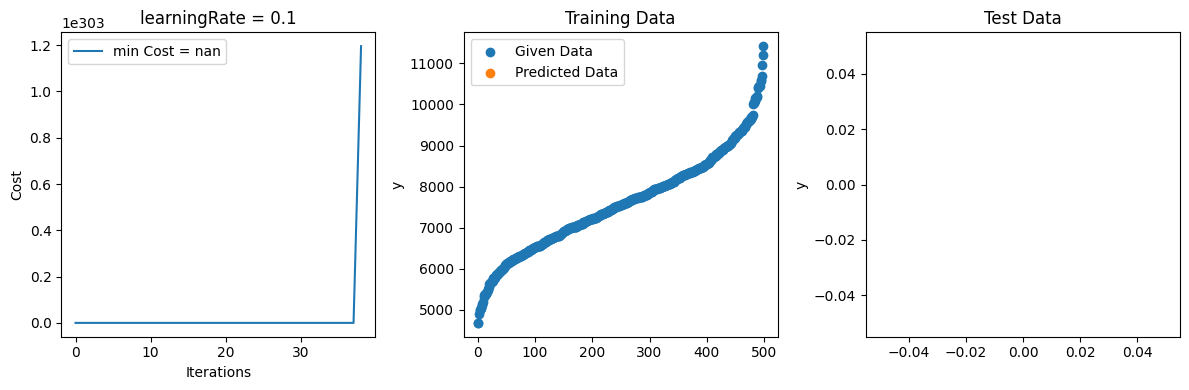

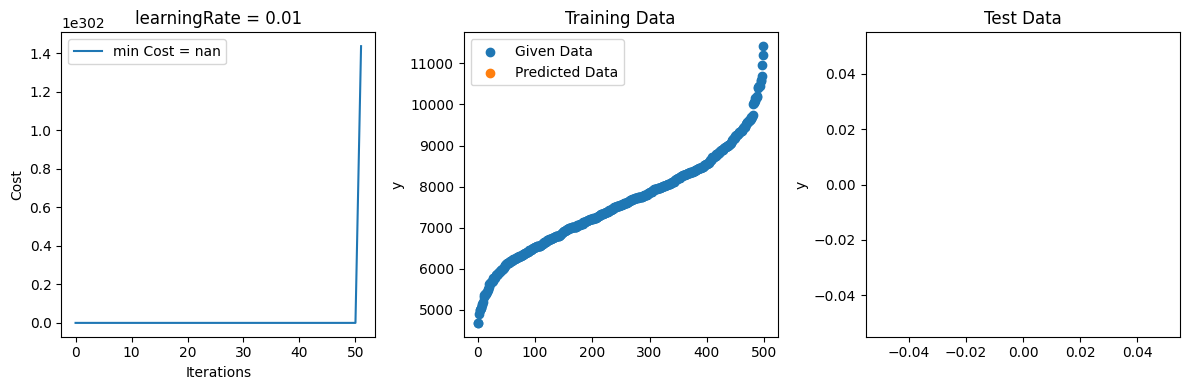

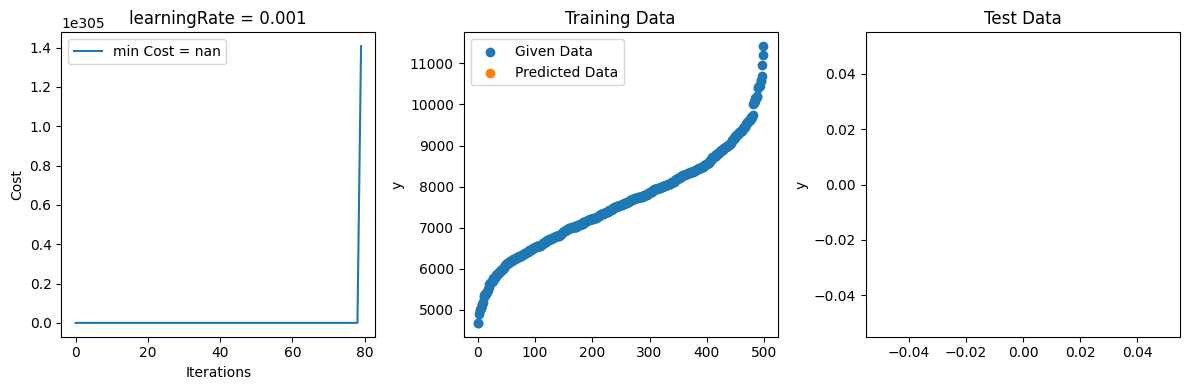

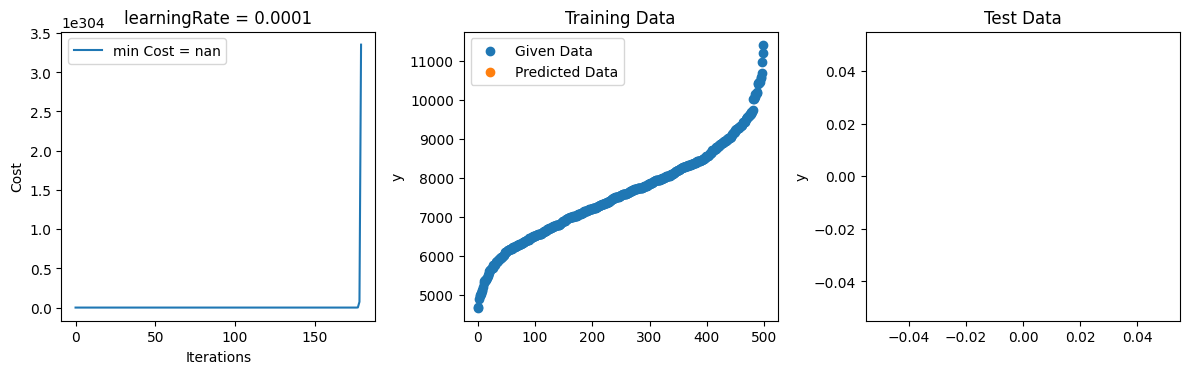

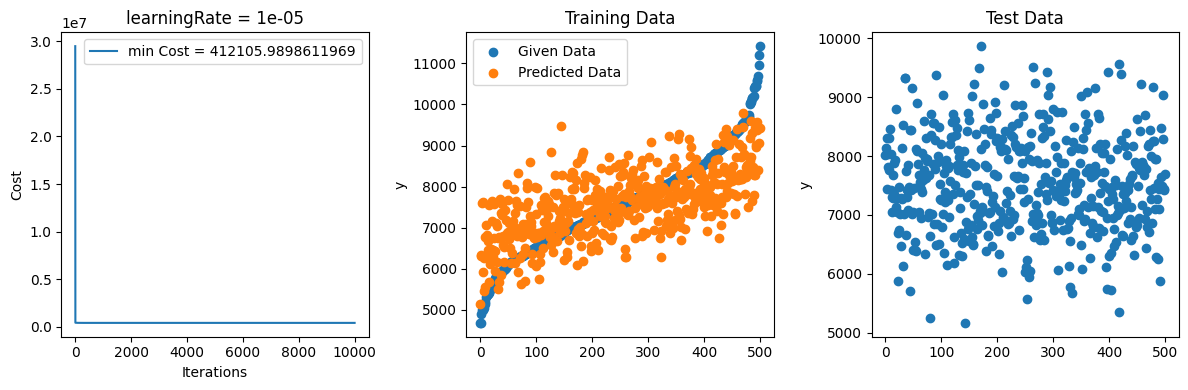

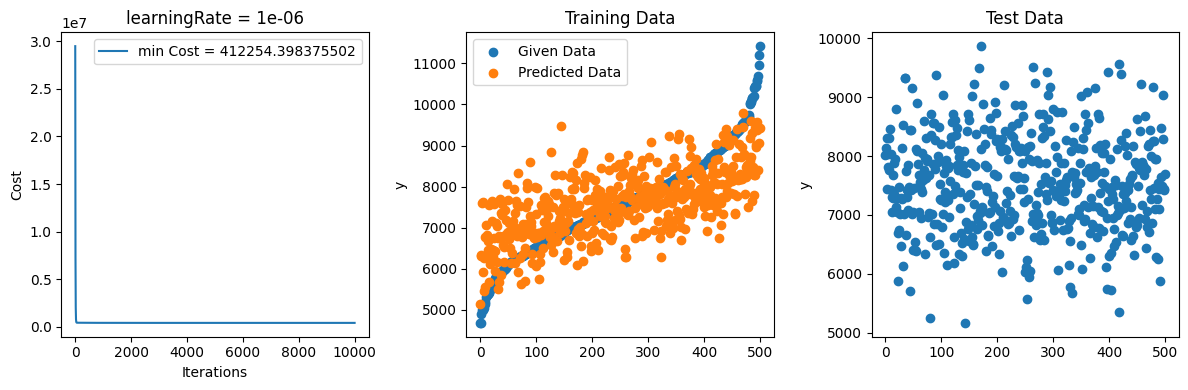

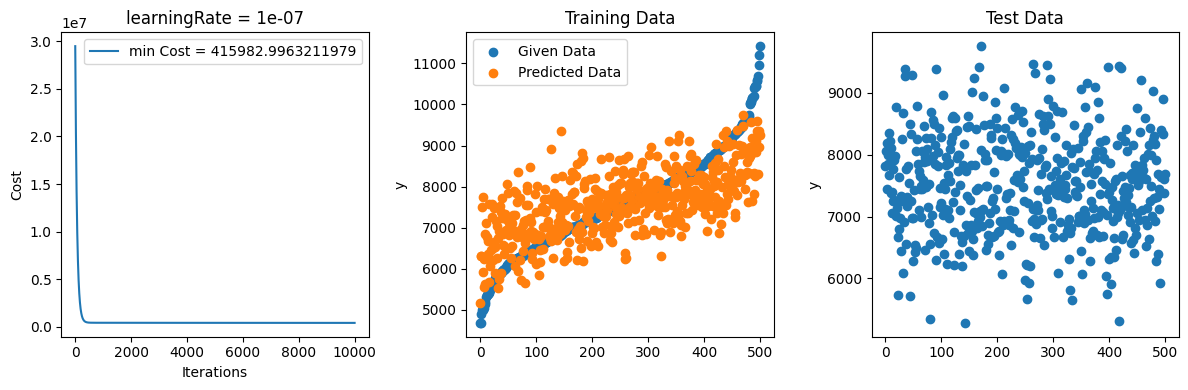

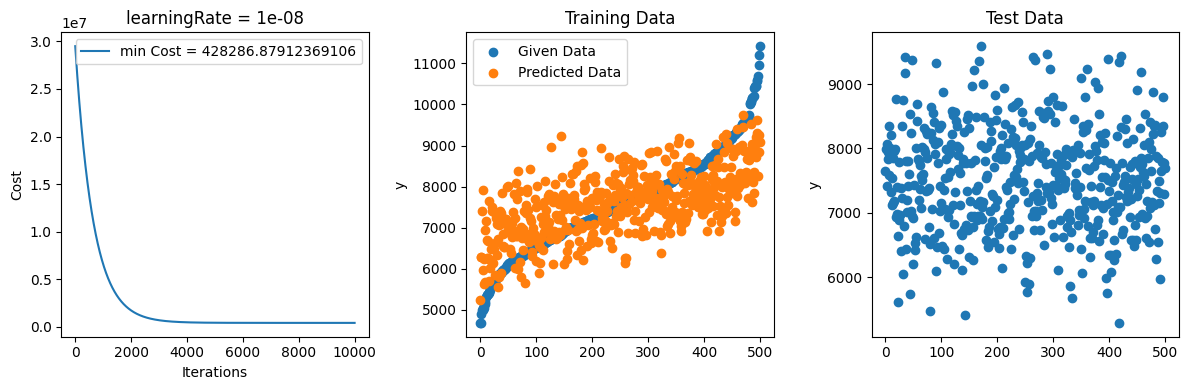

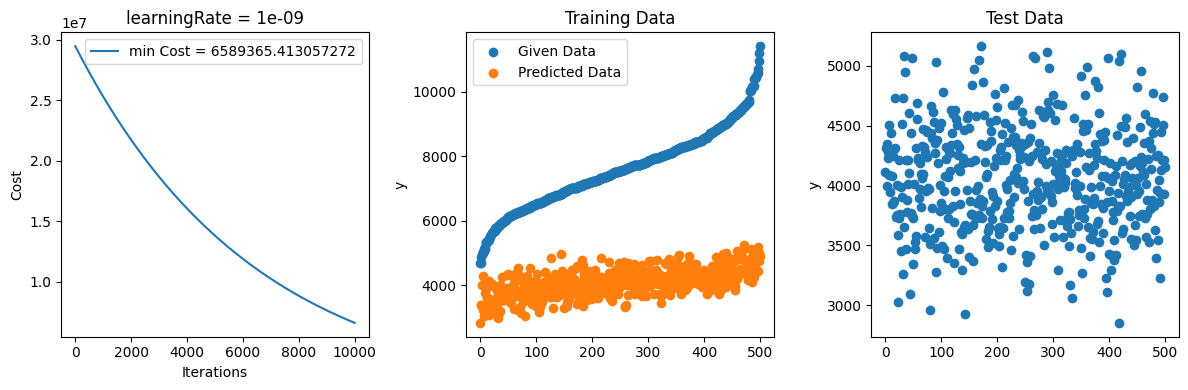

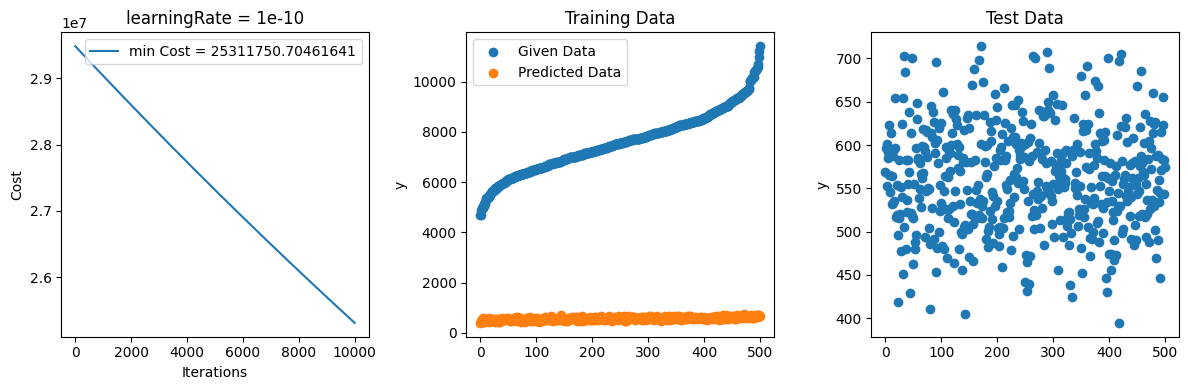

In [10]:
for rate in learningRate:
    plottingLinearRegression(rate,iterations)